<a href="https://colab.research.google.com/github/taufiq20229001/Final-Project-Taufiq/blob/main/Final_Project_Code_ID_20229001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

Early diagnosis of diabetes is important to prevent the onset of complications. In this project, we will analyze the survey data on health indicators that may be associated with diabetes.

There are two main aims of this project:
- to find out the indicators that are most associated with diabetes
- to build a model to predict diabetes

We will start by exploring the data and then build a model to predict diabetes. We will compare the performance of some of the models and finally select some models will be used to predict diabetes in a test dataset.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

from sklearn import metrics
from sklearn.metrics import roc_curve, auc 

sns.set_style('white')
sns.set_palette('Set2')

# Load and clean data

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
FOLDER_NAME = 'JU Documents'
DATASET_FILE_NAME = 'diabetes.csv'
%cd /content/drive/My Drive/JU Documents
df =pd.read_csv(DATASET_FILE_NAME)

raw_dataset =df


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/JU Documents


# Exploratory data analysis

In this section, I will explore the training data to find out more about the data. 
Note that the EDA is applied to all subjects, including both diabetes and non-diabetes groups.



In [ ]:
# what are the unique values for all variable?
for col in raw_dataset.columns:
    print(f"{col}: {np.sort(raw_dataset[col].unique())}")
    

Diabetes_binary: [ 0.  1. nan]
HighBP: [0 1]
HighChol: [0 1]
CholCheck: [0 1]
BMI: [12. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29.
 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47.
 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65.
 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83.
 84. 85. 86. 87. 89. 92. 95. 98. nan]
Smoker: [0 1]
Stroke: [ 0.  1. nan]
HeartDiseaseorAttack: [0 1]
PhysActivity: [ 0.  1. nan]
Fruits: [ 0.  1. nan]
Veggies: [0 1]
HvyAlcoholConsump: [ 0.  1. nan]
AnyHealthcare: [0 1]
NoDocbcCost: [0 1]
GenHlth: [1 2 3 4 5]
MentHlth: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
PhysHlth: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30]
DiffWalk: [0 1]
Sex: [0 1]
Age: [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
Education: [1 2 3 4 5 6]
Income: [1 2 3 4 5 6 7 8]


In [ ]:
# check missing values
raw_dataset.isnull().sum()

Diabetes_binary         5
HighBP                  0
HighChol                0
CholCheck               0
BMI                     2
Smoker                  0
Stroke                  3
HeartDiseaseorAttack    0
PhysActivity            2
Fruits                  1
Veggies                 0
HvyAlcoholConsump       1
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

We can see that the data contains some missing values. We will try to remove them.
Thare are missing fields in the following rows:


*   Diabetes_binary
*   BMI
*   Stroke
*   PhysActivity
*   Fruits
*   HvyAlcoholConsump

Since all the colums values except BMI are Binary, we will replace the BMI missing values with mean and For the other colums we will remove the rows entirely.


In [ ]:
raw_dataset['BMI'].replace([np.nan], raw_dataset['BMI'].mean(), inplace=True)
raw_dataset.isnull().sum()

Diabetes_binary         5
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  3
HeartDiseaseorAttack    0
PhysActivity            2
Fruits                  1
Veggies                 0
HvyAlcoholConsump       1
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
dataset = raw_dataset.dropna()
dataset.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Great, it looks like we have clean datasets. There is no missing values and all the data types are float (even they are categorical).

# check the data types



In [ ]:
# check the data types
print(dataset.dtypes)

Diabetes_binary         float64
HighBP                    int64
HighChol                  int64
CholCheck                 int64
BMI                     float64
Smoker                    int64
Stroke                  float64
HeartDiseaseorAttack      int64
PhysActivity            float64
Fruits                  float64
Veggies                   int64
HvyAlcoholConsump       float64
AnyHealthcare             int64
NoDocbcCost               int64
GenHlth                   int64
MentHlth                  int64
PhysHlth                  int64
DiffWalk                  int64
Sex                       int64
Age                       int64
Education                 int64
Income                    int64
dtype: object


In [ ]:
train, test = train_test_split(dataset, test_size=0.3, random_state=55)


In [ ]:
# the train and test data should have the same columns, let's check
print(f"train shape: {train.shape}")
print(f"test shape: {test.shape}")

# check the columns
print(train.columns == test.columns)


train shape: (49476, 22)
test shape: (21204, 22)
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True]


In [ ]:
# describe the data
train.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,...,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.000000,49476.00000,49476.000000
mean,0.499818,0.562758,0.525002,0.975443,29.865646,0.475544,0.062677,0.147486,0.702886,0.611125,...,0.955211,0.093540,2.836082,3.758833,5.813324,0.254911,0.456666,8.581878,4.91988,5.702300
std,0.500005,0.496051,0.499380,0.154773,7.109703,0.499407,0.242383,0.354593,0.456992,0.487500,...,0.206843,0.291191,1.113985,8.182880,10.060613,0.435816,0.498124,2.849165,1.02967,2.177213
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.00000,4.000000
50%,0.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.00000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.00000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.00000,8.000000


In [ ]:
# what are the unique values for all variable?
for col in train.columns:
    print(f"{col}: {np.sort(train[col].unique())}")
    

Diabetes_binary: [0. 1.]
HighBP: [0 1]
HighChol: [0 1]
CholCheck: [0 1]
BMI: [13.         14.         15.         16.         17.         18.
 19.         20.         21.         22.         23.         24.
 25.         26.         27.         28.         29.         29.85705192
 30.         31.         32.         33.         34.         35.
 36.         37.         38.         39.         40.         41.
 42.         43.         44.         45.         46.         47.
 48.         49.         50.         51.         52.         53.
 54.         55.         56.         57.         58.         59.
 60.         61.         62.         63.         64.         65.
 66.         67.         68.         69.         70.         71.
 72.         73.         74.         75.         76.         77.
 78.         79.         80.         81.         82.         84.
 86.         87.         89.         92.         95.         98.        ]
Smoker: [0 1]
Stroke: [0. 1.]
HeartDiseaseorAttack: [0 1]
Phy

In [ ]:
train['Diabetes_binary'].value_counts()

0.0    24747
1.0    24729
Name: Diabetes_binary, dtype: int64

For the feature variables, there are two types of data: categorical and numerical. We will explore them separately.

## Categorical variables

In [ ]:
# categorical columns - We roughly grouped them 
cat_socialecom = ['Age', 'Sex', 'Education', 'Income', 'AnyHealthcare', 'NoDocbcCost']
cat_disease = ['HighBP', 'HighChol', 'CholCheck', 'Stroke', 'HeartDiseaseorAttack', 'DiffWalk']
cat_health = ['GenHlth', 'MentHlth', 'PhysHlth']
cat_habit = ['PhysActivity', 'Smoker', 'Fruits', 'Veggies', 'HvyAlcoholConsump']

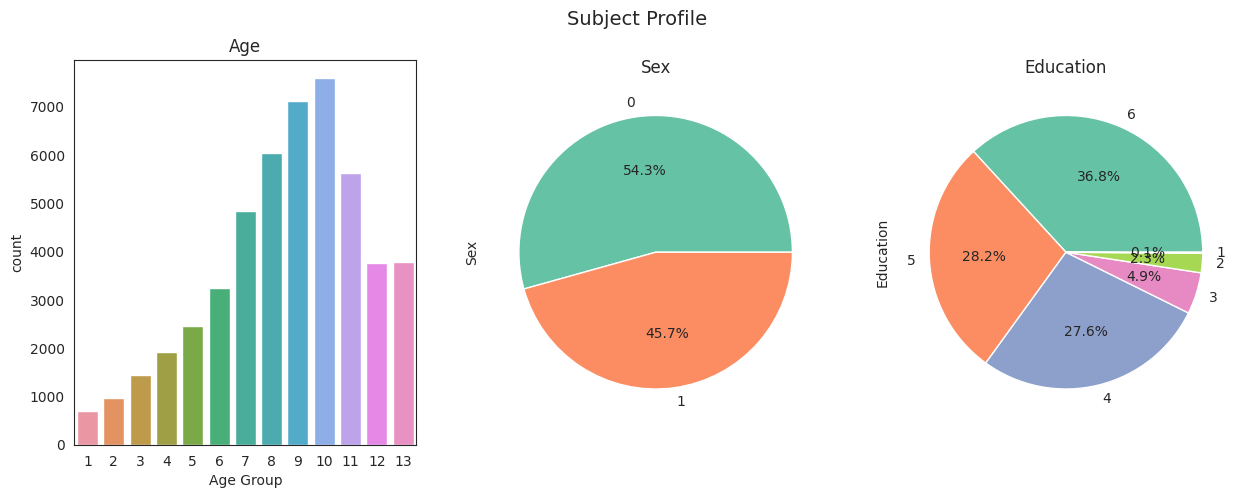

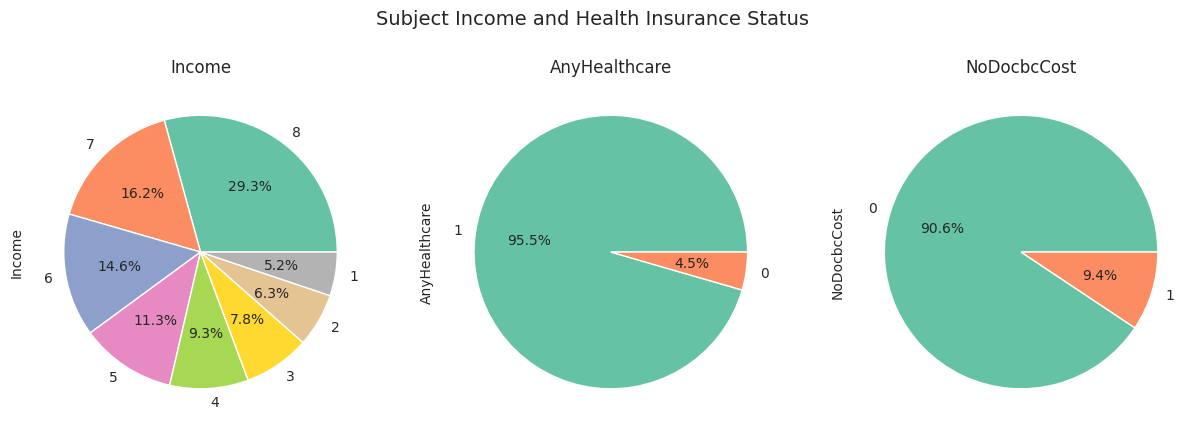

In [ ]:
# Let's first check the social and economic status of the subjects

# what are the profile of all the subjects?
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes = axes.flatten()
sns.countplot(x='Age', data=train, ax=axes[0])
axes[0].set_title('Age')
axes[0].set_xlabel('Age Group')

for i, col in enumerate(['Sex', 'Education']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i+1], title=col)
plt.suptitle('Subject Profile', fontsize=14)
plt.show()

# what are the
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes = axes.flatten()
for i, col in enumerate(['Income', 'AnyHealthcare', 'NoDocbcCost']):
    train[col].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[i], title=col)
plt.suptitle('Subject Income and Health Insurance Status', fontsize=14)
plt.show()

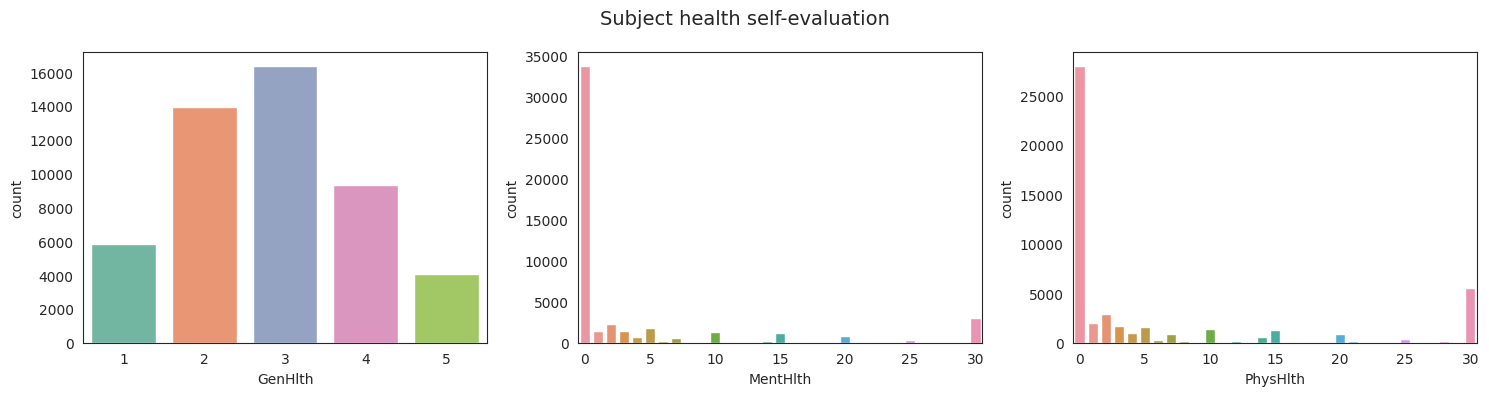

In [ ]:
# how do they evaluate their health? plot distribution 
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
axes = axes.flatten()
for i, col in enumerate(cat_health):
    g = sns.countplot(x=col, data=train, ax=axes[i])
    if len(train[col].unique()) > 5:
        g.set_xticks(np.arange(0, len(train[col].unique()), 5))
plt.suptitle('Subject health self-evaluation', fontsize=14)
plt.tight_layout()
plt.show()

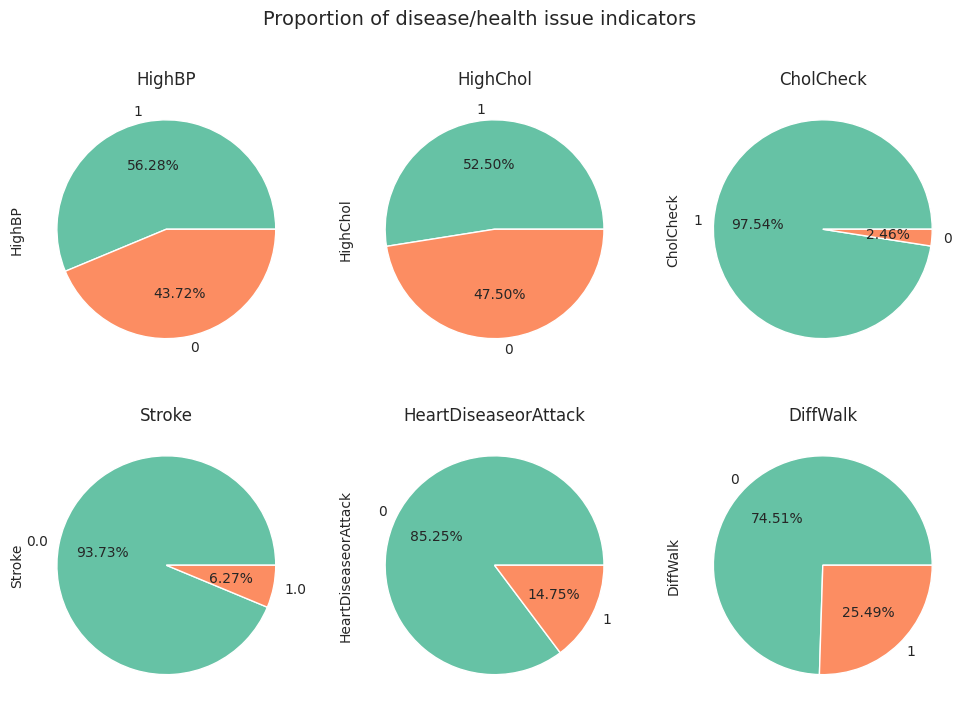

In [ ]:
# let's check the distribution of binary health indicators using a pie chart
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_disease):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of disease/health issue indicators', fontsize=14)
plt.show()


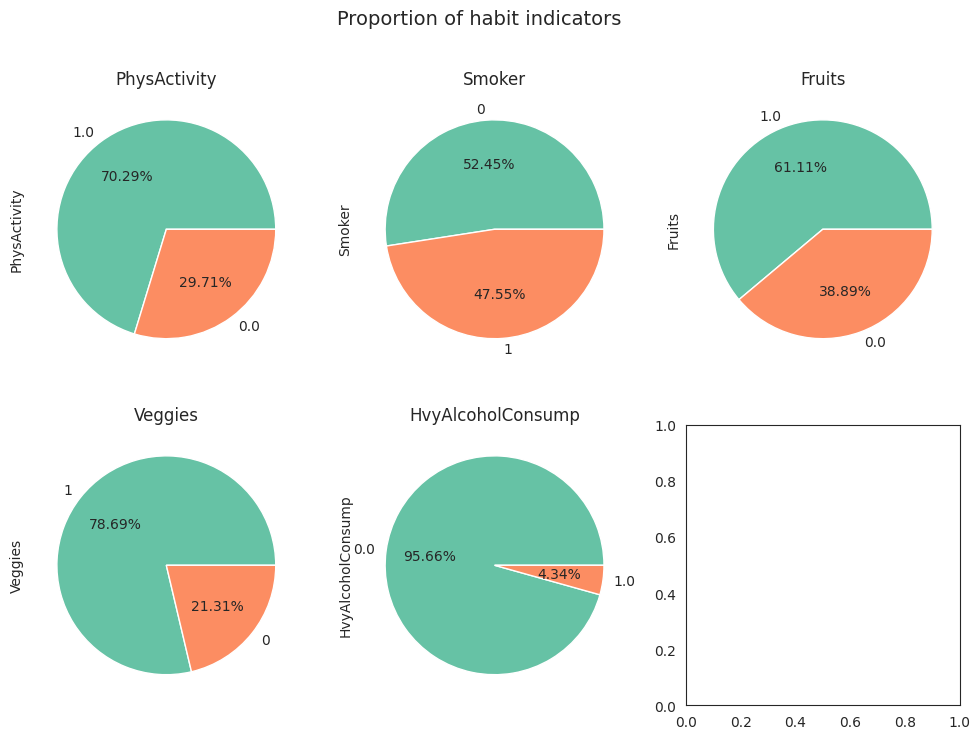

In [ ]:
# now check the distribution of the habit indicators
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
for i, col in enumerate(cat_habit):
    train[col].value_counts().plot.pie(ax=ax[i//3, i%3], autopct='%.2f%%', title=col)
plt.suptitle('Proportion of habit indicators', fontsize=14)
plt.show()


## Numerical variables

The only numerical variable analyzed in this section is the BMI index, although it is probably rounded to the nearest integer (thus they can be regarded as categorical variables in some sense).

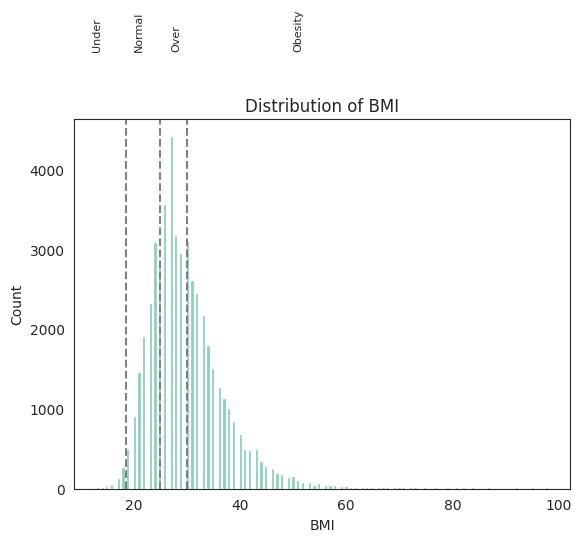

In [ ]:
# plot the distribution of BMI  

# The World Health Organization (WHO) defines the following BMI ranges for adults:

# Underweight: BMI less than 18.5
# Normal weight: BMI between 18.5 and 24.9
# Overweight: BMI between 25 and 29.9
# Obesity: BMI of 30 or greater

plt.axvline(18.5, color='gray', linestyle='--')
plt.axvline(24.9, color='gray', linestyle='--')
plt.axvline(29.9, color='gray', linestyle='--')

# add text
plt.text(12, 5500, 'Under', rotation=90, size=8)
plt.text(20, 5500, 'Normal', rotation=90, size=8)
plt.text(27, 5500, 'Over', rotation=90, size=8)
plt.text(50, 5500, 'Obesity', rotation=90, size=8)

sns.histplot(train['BMI'], kde=False)

plt.title('Distribution of BMI')
plt.show()

# Relationship between features and target

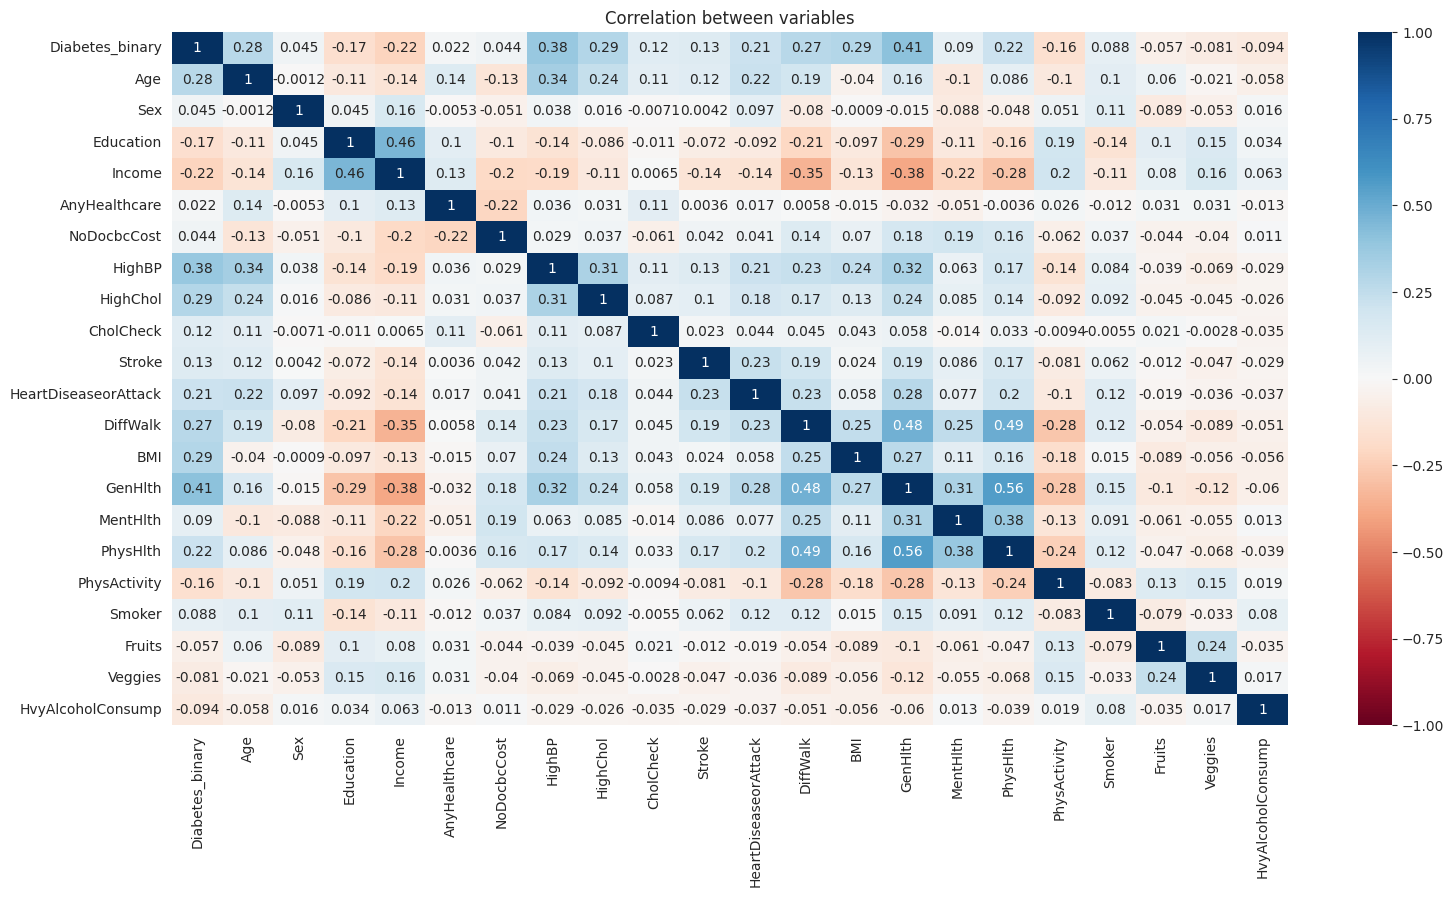

In [ ]:
# plot a heatmap to check the correlation between the variables

# for better grouping and interpretation,sort columns by the list of columns created above
cols = ['Diabetes_binary'] + cat_socialecom + cat_disease +  ['BMI'] + cat_health + cat_habit

plt.figure(figsize=(18, 9))
# nomralize the color scale
sns.heatmap(train[cols].corr(), annot=True, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation between variables')
plt.show()


In [ ]:
# Top 15 variables that are correlated with the target variable - use absolute value to get the absolute correlation
train.corr()['Diabetes_binary'].abs().sort_values(ascending=False).head(15)


Diabetes_binary         1.000000
GenHlth                 0.408583
HighBP                  0.381998
BMI                     0.293530
HighChol                0.289490
Age                     0.277060
DiffWalk                0.274953
Income                  0.224421
PhysHlth                0.217020
HeartDiseaseorAttack    0.211111
Education               0.169118
PhysActivity            0.160078
Stroke                  0.125094
CholCheck               0.117344
HvyAlcoholConsump       0.094023
Name: Diabetes_binary, dtype: float64

## Most important indicators based on correlation results

Diabetes looks positively correlated with the age and negatively correlated with income. 

It seems that subjects fairly evaluated their health status: if they think their health is poor, they are more likely to have diabetes. Similar correlation can be found between having diabetes amd  the evaluation about physical status.

The physical measures are correlated with diabetes, which is expected. High BP, high BMI, high Cholesterol are correlated with having diabetes. 

Health issues and diseases are more correlated with diabetes than the health habits. For example, the chance of having heart attack, stroke, or difficulties in walking is correlated with having diabetes. 

Among the health habits, whether having physical activity in past 30 days (`PhysActivity`) is the most correlated with diabetes (in a negative way).

Overall, correlation results show some indicators that are most effective in predicting diabetes. Note that it cannot imply causation. For example, the correlation between diabetes and BP is positive, but it does not mean that high BP causes diabetes. For the next step, we will use machine learning models to predict diabetes based on the indicators.

# Machine learning models
The target variable of the prediction is `Diabetes` (1 for (pre-)diabetes, 0 for non-diabetes). The feature variables are all the other variables. Therefore, the problem is a binary classification problem. I will try the following models to predict diabetes:

* Logistic regression
* Decision tree
* K-nearest neighbors

The model will be trained on the training data and tested on the test data. 

In [ ]:
# split the data into X and y
X = train.drop('Diabetes_binary', axis=1)
y = train['Diabetes_binary']

# split the data into train and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

X_test = test.drop('Diabetes_binary', axis=1)
y_test = test['Diabetes_binary']

In [ ]:
# feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)



## Model fitting and evaluation

In [ ]:
# create a function to evaluate the model

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


In [ ]:
# build a dictionary of models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'KNN': KNeighborsClassifier()
}

# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

In [ ]:
results.sort_values(by='val_accuracy', ascending=False)

,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
0,0.748105,0.738599,0.767434,0.752740,0.748120,0.745049,0.736341,0.764433,0.750124,0.745025,Logistic Regression
2,0.798711,0.784503,0.823262,0.803415,0.798730,0.705740,0.696195,0.731328,0.713329,0.705709,KNN
1,0.996362,0.999593,0.993123,0.996347,0.996359,0.658448,0.658286,0.660678,0.659480,0.658445,Decision Tree


The Decision Tree model seem overfitting: the accuracy score on the training data is much higher than that on the test data.


---------------------------------------

# Feature importance
Since Logistic Regression and KNN gives the best results, we will dig further to get more detailed information.[link text](https://)

###  Logistic Regression

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
x=train.columns.values.tolist()
importances = pd.DataFrame(data={
    'Attribute': x[1:],
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

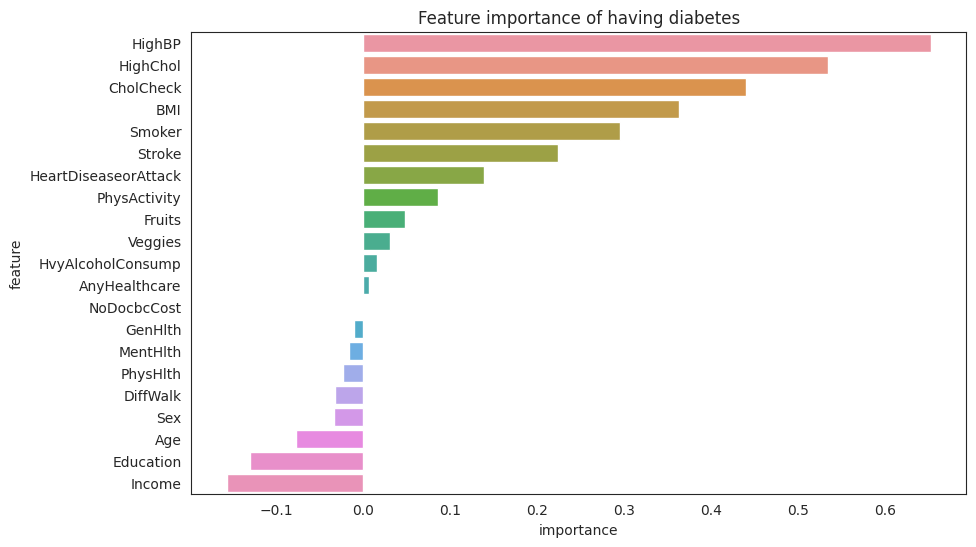

In [ ]:
# plot the feature importance
feature_importance = pd.DataFrame({'feature':  x[1:], 'importance': importances['Importance']})
feature_importance.sort_values(by='importance', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature importance of having diabetes')
plt.show()

In [ ]:
# the total importance of the top 8 features
feature_importance.head(8)['importance'].sum()

2.7372730231624556

We can find that feature importance analysis results are roughly consistent with the correlation results.

# Predict test data

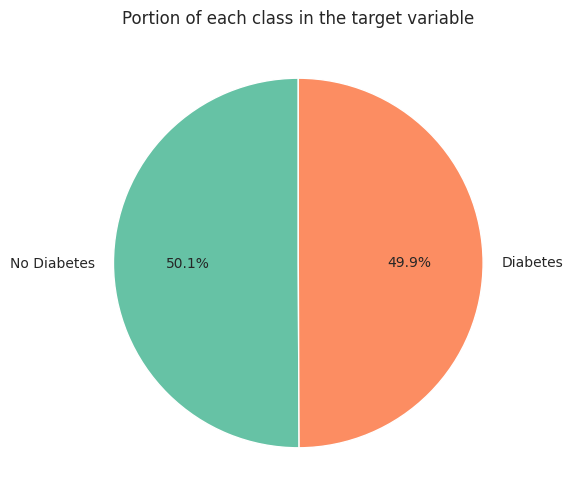

In [ ]:
# plot the portion of each class in the target variable as pie chart
plt.figure(figsize=(6, 6))
plt.pie(y_test.value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.1f%%', startangle=90)
plt.title('Portion of each class in the target variable')
plt.show()


In [ ]:
log_reg = LogisticRegression()
# training the model
log_reg.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = log_reg.predict(X_test)

print('Train Score is : ' , log_reg.score(X_train, y_train))
print('Test Score is : ' , log_reg.score(X_test, y_test))


Train Score is :  0.7481051035876706
Test Score is :  0.7475004716091304


Text(0.5, 1.0, 'Receiver operating characteristic example')

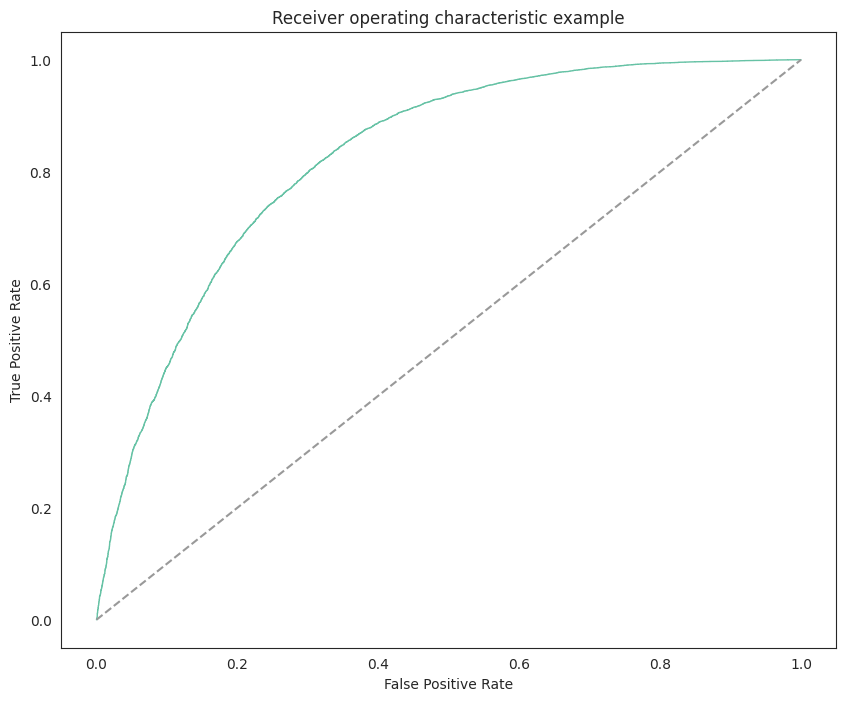

In [ ]:
plt.figure(figsize=(10,8))
probas_ = log_reg.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')


### K-Nearest Neighbors (KNN)

In [ ]:
knn = KNeighborsClassifier() # build the model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print('Train Score is : ' , knn.score(X_train, y_train))
print('Test Score is : ' , knn.score(X_test, y_test))

Train Score is :  0.798711470439616
Test Score is :  0.7123184304848141


Text(0.5, 1.0, 'Receiver operating characteristic example')

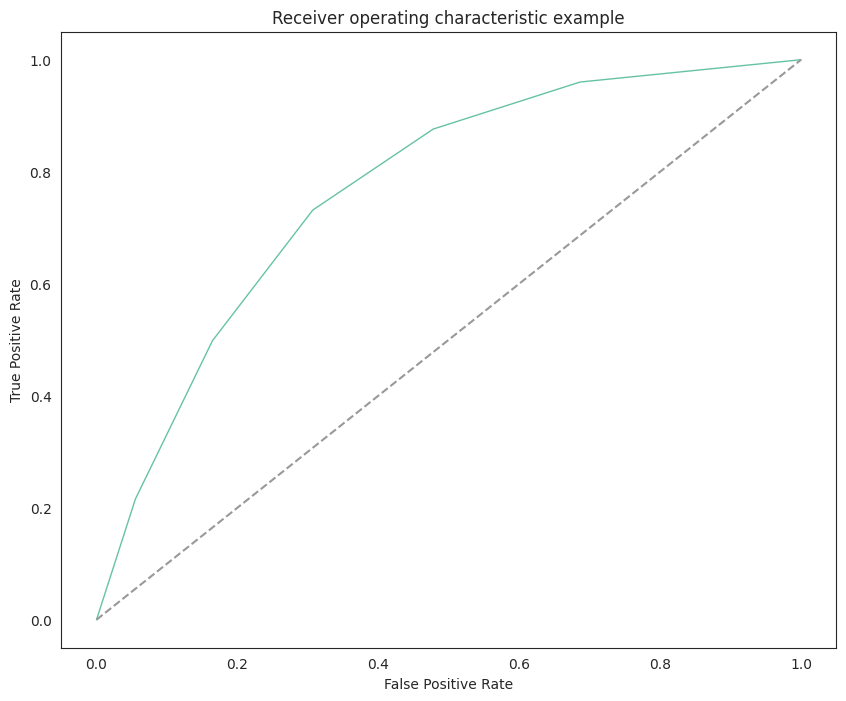

In [ ]:
plt.figure(figsize=(10,8))
probas_ = knn.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=1, label='ROC fold (area = %0.2f)' % (roc_auc))
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

### Classification Report, Accuracy Score, Confusion Matrix and ROC Curve

In [ ]:
print('Classification Report is: \n \n' , classification_report(y_test, y_pred ))

Classification Report is: 
 
               precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10587
         1.0       0.74      0.77      0.75     10617

    accuracy                           0.75     21204
   macro avg       0.75      0.75      0.75     21204
weighted avg       0.75      0.75      0.75     21204



The accuracy score is: 0.7475004716091304

 Confusion matrix 
 
 [[7692 2895]
 [2459 8158]]
              precision    recall  f1-score   support

         0.0       0.76      0.73      0.74     10587
         1.0       0.74      0.77      0.75     10617

    accuracy                           0.75     21204
   macro avg       0.75      0.75      0.75     21204
weighted avg       0.75      0.75      0.75     21204



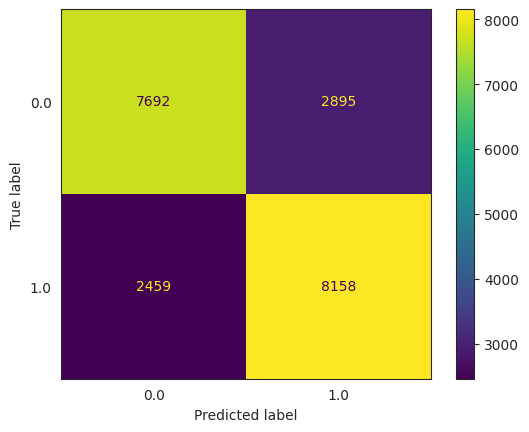

In [ ]:
print('The accuracy score is:', accuracy_score(y_test, y_pred)) # accuracy score

cm = confusion_matrix(y_test, y_pred) # Confusion matrix 
print('\n Confusion matrix \n \n', cm)
print(classification_report(y_test, y_pred ))

disp = ConfusionMatrixDisplay(cm, display_labels=knn.classes_) # new plotting method 
disp.plot()
plt.show()

In [ ]:
size = metrics.roc_auc_score(y_test, y_pred)
print(size)

0.7474708742078746


#Need too add data from above charts  *********

The model prediction looks okay, with 0.75 accuracy score. Note that the precision for the positive class (Diabetes) are very low. This is because the dataset is imbalanced. 

The ROC AUC score is 0.75, which is not bad. We can also find that in the check auc-roc curve.

# Conclusion

- What are the most important indicators for diabetes? 
    - Both correlation and feature importance analysis show that the most important indicators are:
        - High blood pressure
        - High BMI
        - High cholesterol
        - Smoking Habit
        - Having heart disease or attack
        - Age
        - DIfficulties in walking
        - Income

    - Interestingly, the health habits are not the most important indicators.

- We can predict diabetes with 0.74 accuracy score after model selection.

- The indicators listed above together can contribute to majority of the performance of the model.


## Outlook
- It is interesting to think about the causation. Further analysis can be done to find out the causal relationship between the indicators and diabetes.
